# LSTM Model Using IMDB Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Set the parameters for loading the dataset
max_features = 5000    # Only consider the top 5000 words in the dataset
maxlen = 100           # Limit each review to 100 words

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to make them of equal length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


2023-06-21 20:57:35.599635: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-21 20:57:36.348631: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


17464789/17464789 [==============================] - 8s 0us/step


In [11]:
x_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117,    2,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194,    2,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30,    2,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16,    2,   19,  178,
         32], dtype=int32)

In [12]:
y_train[0]

1

In [3]:
# Set the model parameters
embedding_size = 32
lstm_size = 100

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, embedding_size),
    tf.keras.layers.LSTM(lstm_size),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


2023-06-21 20:58:17.487357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-21 20:58:17.563970: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-21 20:58:17.796662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gra

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 5
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/5


2023-06-21 20:58:27.170985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 20:58:27.172282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 20:58:27.173206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 [==============================] - ETA: 0s - loss: 0.4417 - accuracy: 0.7803

2023-06-21 20:58:48.058014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-21 20:58:48.058978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-21 20:58:48.059897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 [==============================] - 28s 69ms/step - loss: 0.4417 - accuracy: 0.7803 - val_loss: 0.3417 - val_accuracy: 0.8490
Epoch 2/5
391/391 [==============================] - 24s 61ms/step - loss: 0.3042 - accuracy: 0.8726 - val_loss: 0.3882 - val_accuracy: 0.8280
Epoch 3/5
391/391 [==============================] - 25s 64ms/step - loss: 0.2586 - accuracy: 0.8968 - val_loss: 0.3622 - val_accuracy: 0.8444
Epoch 4/5
391/391 [==============================] - 23s 58ms/step - loss: 0.2208 - accuracy: 0.9129 - val_loss: 0.3949 - val_accuracy: 0.8416
Epoch 5/5
391/391 [==============================] - 26s 68ms/step - loss: 0.1861 - accuracy: 0.9298 - val_loss: 0.4181 - val_accuracy: 0.8350


In [5]:

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

782/782 [==============================] - 8s 11ms/step - loss: 0.4181 - accuracy: 0.8350
Test loss: 0.41812339425086975
Test accuracy: 0.8349999785423279


782/782 [==============================] - 9s 12ms/step - loss: 0.4181 - accuracy: 0.8350
Test loss: 0.41812339425086975
Test accuracy: 0.8349999785423279


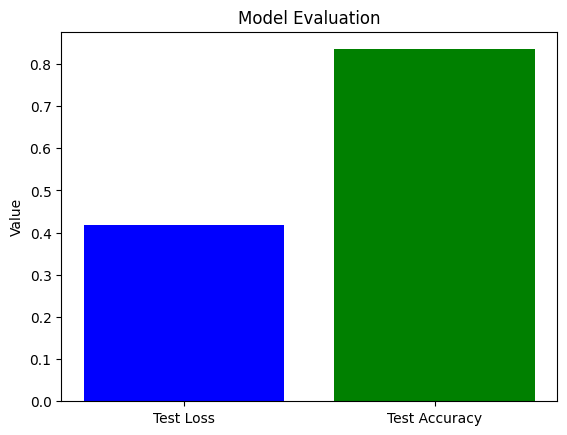

In [7]:
import matplotlib.pyplot as plt

# Evaluate the model and get the loss and accuracy
loss, accuracy = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Define colors for each bar
colors = ['blue', 'green']

# Create a bar chart
labels = ['Test Loss', 'Test Accuracy']
values = [loss, accuracy]

plt.bar(labels, values, color=colors)
plt.ylabel('Value')
plt.title('Model Evaluation')
plt.show()
